# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [2]:
import nltk
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import requests_cache
requests_cache.install_cache('demo_cache')
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS


In [3]:
import requests
from bs4 import BeautifulSoup
import urllib2
import requests
import itertools

def get_link(url, numpages):
    """
    Extract the url of all articles in the website
    Input: url and page number
    Output: the url of all articles on that page
    """
    result = []
    url = url + 'page/' + str(numpages) + '/'
    response = urllib2.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')
    for i in soup.find_all('h2', attrs={'class':'entry-title'}):
        result.append(i.a['href']);
    result = [str(x) for x in result]
    return result


__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [4]:
import requests
from bs4 import BeautifulSoup
import urllib2
import requests
def get_inf(url):
    """
    Extract the content of articles 
    Input: url of the article
    Output: aruthor, text,title and url of the article
    """
    text = []
    list_1 = []
    response = urllib2.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'lxml')
    result = soup.find_all('div', itemprop = 'articleBody')
    author = result[0].find_all('p')[-1].text
    result_1 = result[0].find_all('p')
    del result_1[-1]
    for i in result_1:
        d = i.text.translate({0x2018:0x27, 0x201c:0x22, 0x201D:0x22, 0x2026:0x20})
        list_1.append(d)
    text = u' '.join(list_1)
    title_1 = soup.find_all('h1', itemprop = 'headline')
    title = title_1[0].text
    dict_1 = {
        'author':author,
        'text': text,
        'title': title,
        'url': url,
    }
    return dict_1

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [5]:
import pandas as pd
import numpy as np
import os
import glob
dat_1 = []
dat_2 = []
result = []
for j in range(1,5):
    for i in get_link('https://theaggie.org/campus/',j):
        dat_1.append(get_inf(i))


In [6]:
dat_campus = pd.DataFrame(dat_1)

In [7]:
dat_campus

,author,text,title,url
0,More information on stack parking can be found...,New parking program aims to increase parking a...,Stack parking comes to UC Davis,https://theaggie.org/2017/02/26/stack-parking-...
1,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...
2,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...
3,Abedifard said Sadeghi’s speech resonated with...,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...
4,“As with any remodel project on a building tha...,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...
5,Written by: Ivan Valenzuela — campus@theaggie.org,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...
6,Written by: Alyssa Vandenberg — campus@theagg...,"Shaheen’s name to remain on ballot, his votes ...",Senate candidate Zaki Shaheen withdraws from race,https://theaggie.org/2017/02/22/senate-candida...
7,Written by: Aaron Liss — campus@theaggie.org,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,https://theaggie.org/2017/02/21/uc-davis-exper...
8,Written by: Alyssa Vandenberg — campus@theagg...,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,https://theaggie.org/2017/02/21/uc-president-s...
9,The UC Davis and UC Office of the President’s ...,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,https://theaggie.org/2017/02/20/katehi-controv...


In [8]:
dat_2 = []
for j in range(1,5):
     for i in get_link('https://theaggie.org/city/',j):
             dat_2.append(get_inf(i))


In [9]:
dat_city = pd.DataFrame(dat_2)
dat_city

,author,text,title,url
0,Written by: Sam Solomon — city@theaggie.org,Brought to you by the people of Davis Feb. 14 ...,Police Logs,https://theaggie.org/2017/02/26/police-logs-13/
1,Written by: Samantha Solomon — city@theaggie.org,"Local Davis restaurant closes doors for ""A Day...",News in Brief: Ali Baba participates in nation...,https://theaggie.org/2017/02/26/news-in-brief-...
2,"“It just feels out of place, not having a Whol...",Local Whole Foods closes Feb. 12 After five ye...,Davis’ Whole Foods Market shuts down,https://theaggie.org/2017/02/23/davis-whole-fo...
3,Written By: Anya Rehon — city@theaggie.org,Demonstrations take place at hundreds of Plann...,Protest against Planned Parenthood in Woodland...,https://theaggie.org/2017/02/23/protest-agains...
4,“We have to demonstrate to the state that we a...,California Redevelopment Agencies require Davi...,Davis’s Historic City Hall building to be put ...,https://theaggie.org/2017/02/23/daviss-histori...
5,"“After you reach out, get involved,” Mansuri s...",Davis residents show solidarity in wake of tra...,Davis stands with Muslim residents,https://theaggie.org/2017/02/21/davis-stands-w...
6,"To help the campus reach its goal, Vang recomm...","CalRecycle donates $197,851 The City of Davis ...",City of Davis awarded funds for new recycling ...,https://theaggie.org/2017/02/20/city-of-davis-...
7,"“Chicken trying to cross the road, loitering a...","The world is a weird place Feb. 6 ""Chronic pho...",Police Logs,https://theaggie.org/2017/02/19/police-logs-12/
8,Written by: Raul Castellanos Jr — city@theaggi...,Mayor Robb Davis reaffirms that the City of Da...,City of Davis to retain sanctuary city status,https://theaggie.org/2017/02/16/city-of-davis-...
9,"“On behalf of the Muslim community in Davis, w...",Davis resident Lauren Kirk-Coehlo arrested in ...,Suspect in Davis Islamic Center vandalism arre...,https://theaggie.org/2017/02/15/suspect-in-dav...


In [10]:
dat_campus["category"] = "campus"
dat_city["category"] = "city"

In [11]:
final = pd.DataFrame.append(dat_campus,dat_city)
final

,author,text,title,url,category
0,More information on stack parking can be found...,New parking program aims to increase parking a...,Stack parking comes to UC Davis,https://theaggie.org/2017/02/26/stack-parking-...,campus
1,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,campus
2,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,campus
3,Abedifard said Sadeghi’s speech resonated with...,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,campus
4,“As with any remodel project on a building tha...,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,campus
5,Written by: Ivan Valenzuela — campus@theaggie.org,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,campus
6,Written by: Alyssa Vandenberg — campus@theagg...,"Shaheen’s name to remain on ballot, his votes ...",Senate candidate Zaki Shaheen withdraws from race,https://theaggie.org/2017/02/22/senate-candida...,campus
7,Written by: Aaron Liss — campus@theaggie.org,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,https://theaggie.org/2017/02/21/uc-davis-exper...,campus
8,Written by: Alyssa Vandenberg — campus@theagg...,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,https://theaggie.org/2017/02/21/uc-president-s...,campus
9,The UC Davis and UC Office of the President’s ...,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,https://theaggie.org/2017/02/20/katehi-controv...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [16]:
#1
import numpy as np  
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    """
    Remove meaningless words in the text
    Input: string of text
    Output: list of unicode
    """
    word = []
    Remove_Words = stopwords.words("english")
    Remove_Words.extend(["also","one","Also",",","in","go","and",".","a","'/'/","''","``","[","]",
                         "be","for","is","S","I","(",")","[","]","The","'","It","get","of","as","with",
                         "what","from","!","$","too","go","since","said","'s","n't","In","like","would",
                         "if","are","need"])
    for words in tokens:
        if words not in Remove_Words:
            word.append(words)
    return [stemmer(w.lower()) for w in word] 

In [17]:
def lemmatize(text):
    """
    Get simple lemmas based on tokenization and stemming
    Input: string of text
    Output: list of strings
    """
    return stem(tokenize(text))

In [20]:
def WORD_Frequency(words):
    """
    Calculate the frequency of the words
    Input: pd.series of text
    Output: the frequency of the words
    """
    textd = {}
    for i in range(len(words)):
        t = words.iloc[i]["text"]
        s = set(lemmatize(t))
        numd = []
        try:
            toks = toks | s
        except NameError:
            toks = s
        for tok in s:
            try:
                textd[tok].append(words.iloc[i]["title"])
            except KeyError:
                textd[tok] = [words.iloc[i]["title"]]
        nume = {key:len(set(val)) for key,val in textd.items()}
        
    return nume

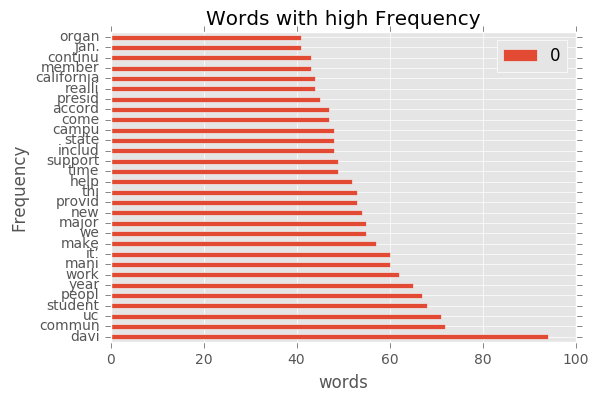

In [23]:

nume = WORD_Frequency(final)
nume = pd.DataFrame.from_dict(nume, orient='index', dtype=None)
nume = nume.sort_values(by = 0, ascending = False)
nume_1 = nume[0:30]
nume_1.plot(y = 0,kind = 'barh', title='Words with high Frequency')
plt.xlabel("words")
plt.ylabel("Frequency")
plt.xlim(0,100)
plt.show()


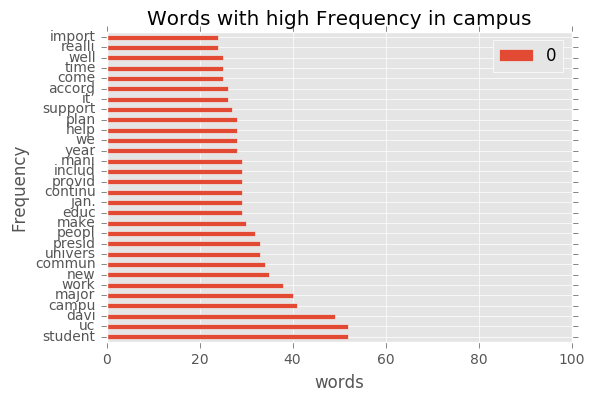

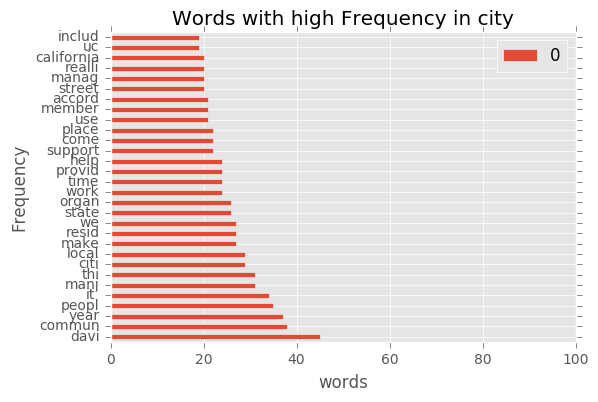

In [31]:
nume = WORD_Frequency(dat_campus)
nume = pd.DataFrame.from_dict(nume, orient='index', dtype=None)
nume = nume.sort_values(by = 0, ascending = False)
nume_1 = nume[0:30]
nume_1.plot(y = 0,kind = 'barh', title='Words with high Frequency in campus')
plt.xlabel("words")
plt.ylabel("Frequency")
plt.xlim(0,100)
plt.show()

nume = WORD_Frequency(dat_city)
nume = pd.DataFrame.from_dict(nume, orient='index', dtype=None)
nume = nume.sort_values(by = 0, ascending = False)
nume_1 = nume[0:30]
nume_1.plot(y = 0,kind = 'barh', title='Words with high Frequency in city')
plt.xlabel("words")
plt.ylabel("Frequency")
plt.xlim(0,100)
plt.show()




First we removing many irrvelance words from the text to help us find the topic of text more precise.
Thenwe could find that most topisc that the Aggie covers  are about  students, community service, davis, ucdavis, california 
and time. Comparing campus articles and city article, we can find campus article focus more on students, education, ucdavis and time.
And city articles focus more on community service, davis, peoepl and year. What is more, campus article has covered the topic work and 
major, which city articles doesn't cover. And city articles have covered the topic residence and street, which campus articles didn't cover
All in all, we can find campus articles care more about student life and study, but city articles care more about resident and local life



In [32]:
#2
txt_city = []
txt_campus = []
for txt in dat_city["text"]:
    txt_city.append(txt)
for txt in dat_campus["text"]:
    txt_campus.append(txt)
city = u" ".join(txt_city)
campus = u" ".join(txt_campus)
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm="l2")
total = [city,campus]
tfs = vectorizer.fit_transform(total)
print tfs.dot(tfs.T)

  (0, 1)	0.615756793508
  (0, 0)	1.0
  (1, 0)	0.615756793508
  (1, 1)	1.0


In [33]:
text = txt_campus+txt_city
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm="l2")
tfs_text = vectorizer.fit_transform(text)
norm = tfs_text.dot(tfs_text.T)


In [37]:
def similarity_min(matrix):
    """
    argument: find three pairs of most similar articles
    input: matirx
    output: pairt of matrix
    """
    result_sort = []
    sort_matrix = np.argsort(matrix,axis  = None)[::-1]
    for i in sort_matrix:
        if (i/120)!=(i%120):
            result_sort.append(i)
    result_sort_con  = [[result_sort[0]/120,result_sort[0]%120],[result_sort[2]/120,result_sort[2]%120],[result_sort[4]/120,result_sort[4]%120]]
    return result_sort_con

In [39]:
index = similarity_min(norm.toarray())
print final["title"].iloc[index[0]]
print final["title"].iloc[index[1]]
print final["title"].iloc[index[2]]

15        UC Davis holds first mental health conference
36    UC Davis to host first ever mental health conf...
Name: title, dtype: object
39     UC Regents vote to raise tuition for UC campuses
25    University of California Regents meet, approve...
Name: title, dtype: object
59    Davis College Republicans club leads protest a...
52            Protests erupt at Milo Yiannopoulos event
Name: title, dtype: object


this are three articles of pair have highest similarity

#3
I think this corpus can not represent the Aggie since we only get the fisrt 60 articles in city and campus, there are lots more 
articles in these two category. What is more, the Aggie not only have these two category, it has more like sports, arts and culture.
Moreover, the date for all of these articles only cover from january to february. As a result, we can conclude this corpus can't '
represent the Aggie. 